In [209]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [210]:
df=pd.read_csv('NVDA.csv')

def q1_devidd(w,df_week):
    #X_test = np.array((range(w,len(df_week)))).reshape(-1,1)
    df_slide = df_week[w:]
    
    pred_price=[]
    pred_label=[]
    profit=[]
    stock_position=0
    cash_position=0
    position_state=0#0 is don't have the position,1 is we keep the long position last day,2 is we keep the short position last day
    for i in range(len(df_week)-w):
        tempList=list(range(i,(i+w)))
        window_list=np.array(tempList).reshape(-1,1)
        window_label=df_week['Adj Close'][i:(i+w)]
        t=[w]
        window_test=np.array(t).reshape(-1,1)
        regr = LinearRegression()
        regr.fit(window_list, window_label)
        t_pre=regr.predict(window_test)
        pred_price.append(t_pre)
        if regr.predict(window_test)>=df_week['Adj Close'][(i+w)-1]:
            pred_label.append("long")
            if position_state==0:
                cash_position=100
                stock_position=cash_position/df_week['Adj Close'][i]
                #profit.append("Nan")
                position_state=1
            elif position_state==1:
                # temp=cash_position
                # cash_position=stock_position*df_temp['Adj Close'][i]
                position_state=1
                #profit.append("Nan")
            elif position_state==2:
                temp = cash_position
                cash_position=stock_position*df_week['Adj Close'][i]
                profit.append(cash_position-temp)
                position_state=1
        else:
            pred_label.append("short")
            if position_state==0:
                cash_position=100
                stock_position=cash_position/df_week['Adj Close'][i]
                #profit.append("Nan")
                position_state=2
            elif position_state==2:
                #profit.append("Nan")
                position_state=2
            elif position_state==1:
                temp = cash_position
                cash_position=stock_position*df_week['Adj Close'][i]
                profit.append(temp-cash_position)
                position_state=2
    #df_slide['profit']=profit
    df_slide['pred_price']=pred_price
    df_slide['pred_label']=pred_label
    return df_slide,profit

df_week_2017=df.loc[df["Year"]==2017,:]
df_week_2018=df.loc[df["Year"]==2018,:].reset_index()








#df_temp.to_csv("test.csv")

    




1. take W = 5,6,...,30 and consider your data for year 1. For each W in the specified range, compute your average P/L per trade and plot it: on x-axis you plot the values of W and on the y axis you plot profit and loss per trade. What is the optimal value W∗ of W?


when the W= 5 the profit avg is 6.652810410265679
when the W= 6 the profit avg is 6.0728313048538025
when the W= 7 the profit avg is 5.446111211518758
when the W= 8 the profit avg is 3.224789195859326
when the W= 9 the profit avg is 7.298815800847094
when the W= 10 the profit avg is 7.024519549370447
when the W= 11 the profit avg is 6.698854492095049
when the W= 12 the profit avg is 6.635741108902143
when the W= 13 the profit avg is 5.122946531338281
when the W= 14 the profit avg is 5.119284294234591
when the W= 15 the profit avg is 5.66351888667992
when the W= 16 the profit avg is 5.444831013916502
when the W= 17 the profit avg is 3.6211303606929834
when the W= 18 the profit avg is 4.65540092776673
when the W= 19 the profit avg is 5.145791915175612
when the W= 20 the profit avg is 4.113778865269917
when the W= 21 the profit avg is 6.239231278992707
when the W= 22 the profit avg is 4.955720224109882
when the W= 23 the profit avg is 6.843384139606801
when the W= 24 the profit avg is 4.8

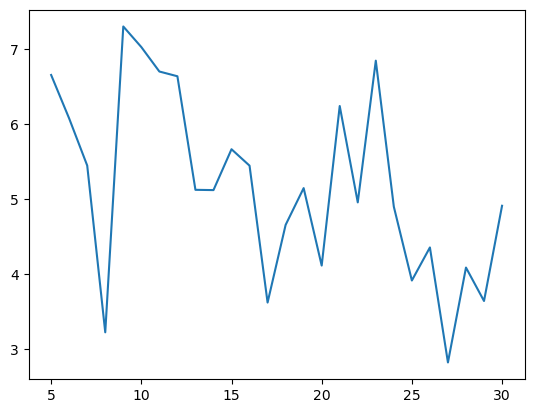

In [211]:
W_list=np.array(range(5,31))
Q1_res=[]
for i in W_list:
    df_temp,Q1_profit=q1_devidd(i,df_week_2017)
    Q1_res.append(sum(Q1_profit)/len(Q1_profit))
    print("when the W=",i,"the profit avg is",sum(Q1_profit)/len(Q1_profit))
plt.plot(W_list,Q1_res)
plt.show()

2. use the value of W ∗ from year 1 and consider year 2. For every day in year 2, take the previous W∗ days, compute linear regression and compute the value of r2 for that day. Plot the graph of r2 for year 2. What is the average r2. How well does it explain price movements?

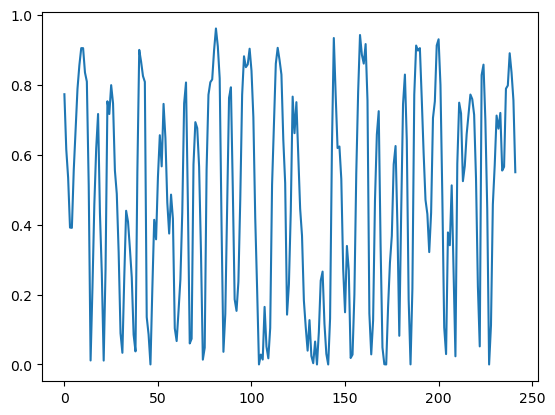

the r*2 mean is 0.4767836102383009 
  It essentially tells you how closely the fluctuations of your investment and the other variable correlate to one another.


In [212]:
def q2(w,df_week):
    #X_test = np.array((range(w,len(df_week)))).reshape(-1,1)
    df_slide = df_week[w:]
    coef=[]
    pred_label=[]
    profit=[]
    stock_position=0
    cash_position=0
    position_state=0#0 is don't have the position,1 is we keep the long position last day,2 is we keep the short position last day
    for i in range(len(df_week)-w):
        tempList=list(range(i,(i+w)))
        window_list=np.array(tempList).reshape(-1,1)
        window_label=df_week['Adj Close'][i:(i+w)]
        t=[w]
        window_test=np.array(t).reshape(-1,1)
        regr = LinearRegression()
        regr.fit(window_list, window_label)
        t_pre=regr.score(window_list,window_label)
        coef.append(float(t_pre))
    return coef
Q2_arr=q2(9,df_week_2018)
#print(Q2_arr)
plt.plot(Q2_arr)
plt.show()
print("the r*2 mean is",np.array(Q2_arr).mean(),"\n"," It essentially tells you how closely the fluctuations of your investment and the other variable correlate to one another.")

3. take the optimal value of W ∗ from year 1 and use it to implement the above trading strategy for year 2. How many ”long position” and ’short position” transactions did you have in year 2?

In [213]:
Q3_df,Q3_profit=q1_devidd(9,df_week_2018)
print("the long position dat is",Q3_df.loc[Q3_df["pred_label"]=="long",:]["index"].count())
print("the short position dat is",Q3_df.loc[Q3_df["pred_label"]=="short",:]["index"].count())

the long position dat is 126
the short position dat is 116


4. what is the average profit/loss per ”long position” trade and per ”short position” trades in year 2?

In [214]:
def q4_devidd(w,df_week):
    #X_test = np.array((range(w,len(df_week)))).reshape(-1,1)
    df_slide = df_week[w:]
    
    pred_price=[]
    pred_label=[]
    profit_long=[]
    profit_short=[]

    stock_position=0
    cash_position=0
    position_state=0#0 is don't have the position,1 is we keep the long position last day,2 is we keep the short position last day
    for i in range(len(df_week)-w):
        tempList=list(range(i,(i+w)))
        window_list=np.array(tempList).reshape(-1,1)
        window_label=df_week['Adj Close'][i:(i+w)]
        t=[w]
        window_test=np.array(t).reshape(-1,1)
        regr = LinearRegression()
        regr.fit(window_list, window_label)
        t_pre=regr.predict(window_test)
        pred_price.append(t_pre)
        if regr.predict(window_test)>=df_week['Adj Close'][(i+w)-1]:
            pred_label.append("long")
            if position_state==0:
                cash_position=100
                stock_position=cash_position/df_week['Adj Close'][i]
                #profit.append("Nan")
                position_state=1
            elif position_state==1:
                # temp=cash_position
                # cash_position=stock_position*df_temp['Adj Close'][i]
                position_state=1
                #profit.append("Nan")
            elif position_state==2:
                temp = cash_position
                cash_position=stock_position*df_week['Adj Close'][i]
                profit_long.append(cash_position-temp)
                position_state=1
        else:
            pred_label.append("short")
            if position_state==0:
                cash_position=100
                stock_position=cash_position/df_week['Adj Close'][i]
                #profit.append("Nan")
                position_state=2
            elif position_state==2:
                #profit.append("Nan")
                position_state=2
            elif position_state==1:
                temp = cash_position
                cash_position=stock_position*df_week['Adj Close'][i]
                profit_short.append(temp-cash_position)
                position_state=2
    #df_slide['profit']=profit
    df_slide['pred_price']=pred_price
    df_slide['pred_label']=pred_label
    return df_slide,profit_long,profit_short

In [215]:
Q4,Q4_profit_long,Q4_profit_short=q4_devidd(9,df_week_2018)
print("average profit/loss per ”long position” trade",np.array(Q4_profit_long).mean())
print("average profit/loss per ”short position” trades ",np.array(Q4_profit_short).mean())

average profit/loss per ”long position” trade 2.9098277608915954
average profit/loss per ”short position” trades  4.449848024316113


5. what is the average number of days for long position and short position transactions in year 2?

In [219]:
Q5_profit_long_day=[]
Q5_profit_short_day=[]
for i in W_list:
    Q5,Q5_profit_long,Q5_profit_short=q4_devidd(i,df_week_2018)
    Q5_profit_long_day.append(Q5.loc[Q5["pred_label"]=="long",:]["index"].count())
    Q5_profit_short_day.append(Q5.loc[Q5["pred_label"]=="short",:]["index"].count())
print("average of long is ",np.array(Q5_profit_long_day).mean())
print("average is short is ",np.array(Q5_profit_short_day).mean())


average of long is  118.0
average is short is  115.5


6. are these results very different from those in year 1 for this value of W∗?

In [224]:


Q6,Q6_profit_long,Q6_profit_short=q4_devidd(9,df_week_2017)
print("average profit/loss per ”long position” trade",np.array(Q6_profit_long).mean())
print("average profit/loss per ”short position” trades ",np.array(Q6_profit_short).mean())


Q6_profit_long_day=[]
Q6_profit_short_day=[]
for i in W_list:
    Q6,Q6_profit_long,Q6_profit_short=q4_devidd(i,df_week_2017)
    Q6_profit_long_day.append(Q4.loc[Q4["pred_label"]=="long",:]["index"].count())
    Q6_profit_short_day.append(Q4.loc[Q4["pred_label"]=="short",:]["index"].count())
print("average of long is ",np.array(Q6_profit_long_day).mean())
print("average is short is ",np.array(Q6_profit_short_day).mean())

average profit/loss per ”long position” trade 11.552503162841138
average profit/loss per ”short position” trades  3.399602385685887
average of long is  126.0
average is short is  116.0
